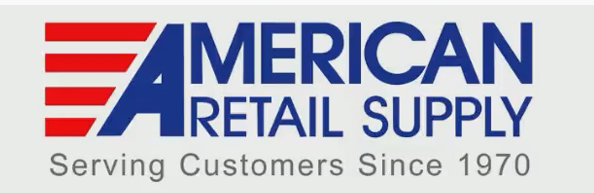

Raw Data Sources : https://www.census.gov/retail/marts/www/timeseries.html

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [96]:
dateparse = lambda x: datetime.strptime(x, '%Y')

In [97]:
retail_sales = pd.read_csv('/content/drive/MyDrive/14_NEW PROJECT CRYPTO/RETAIL_FOOD_US_SALES_M$.csv',parse_dates=[0], index_col=0, date_parser=dateparse) #squeeze=True,

In [98]:
retail_sales.head(30)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEPT,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1992-01-01,130617,130396,130385,130933,131255,131296,132058,133215,133510,134653,135075.0,136833.0
1993-01-01,137487,137021,136351,138228,139420,139265,140453,140203,141570,142027,142670.0,143603.0
1994-01-01,142482,144389,147104,146567,146831,148589,149266,150931,151451,152530,152528.0,153761.0
1995-01-01,154349,152497,153566,153976,155268,155848,156088,156773,157818,156905,158801.0,160236.0
1996-01-01,158350,159720,161543,163145,164099,164270,164328,164886,166072,167610,168253.0,169156.0
1997-01-01,169471,170821,171928,170754,170738,171991,173448,173821,174978,174980,175126.0,175418.0
1998-01-01,176093,176843,176948,178522,179193,179707,181091,181382,181354,183255,184474.0,186057.0
1999-01-01,186333,188260,189026,190327,191524,191997,192947,194517,196167,197299,198696.0,203954.0
2000-01-01,200365,202935,206759,205234,205613,206784,207425,207607,210698,210719,211384.0,212267.0


In [99]:
retail_sales['ANNUAL_SUM']= retail_sales['JAN']+retail_sales['FEB']+retail_sales['MAR']+retail_sales['APR']+retail_sales['MAY']+retail_sales['JUN']+retail_sales['JUL']+retail_sales['AUG']
+retail_sales['SEPT']+retail_sales['OCT']+retail_sales['NOV']+retail_sales['DEC']

YEAR
1992-01-01     540071.0
1993-01-01     569870.0
1994-01-01     610270.0
1995-01-01     633760.0
1996-01-01     671091.0
1997-01-01     700502.0
1998-01-01     735140.0
1999-01-01     796116.0
2000-01-01     845068.0
2001-01-01     856423.0
2002-01-01     890073.0
2003-01-01     943834.0
2004-01-01    1013638.0
2005-01-01    1097760.0
2006-01-01    1138891.0
2007-01-01    1197257.0
2008-01-01    1162865.0
2009-01-01    1146171.0
2010-01-01    1200656.0
2011-01-01    1280340.0
2012-01-01    1324963.0
2013-01-01    1356495.0
2014-01-01    1411073.0
2015-01-01    1421923.0
2016-01-01    1464297.0
2017-01-01    1548410.0
2018-01-01    1608178.0
2019-01-01    1667174.0
2020-01-01    1721908.0
2021-01-01          NaN
dtype: float64

In [100]:
retail_sales.head(30)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEPT,OCT,NOV,DEC,ANNUAL_SUM
YEAR,,,,,,,,,,,,,
1992-01-01,130617,130396,130385,130933,131255,131296,132058,133215,133510,134653,135075.0,136833.0,1050155
1993-01-01,137487,137021,136351,138228,139420,139265,140453,140203,141570,142027,142670.0,143603.0,1108428
1994-01-01,142482,144389,147104,146567,146831,148589,149266,150931,151451,152530,152528.0,153761.0,1176159
1995-01-01,154349,152497,153566,153976,155268,155848,156088,156773,157818,156905,158801.0,160236.0,1238365
1996-01-01,158350,159720,161543,163145,164099,164270,164328,164886,166072,167610,168253.0,169156.0,1300341
1997-01-01,169471,170821,171928,170754,170738,171991,173448,173821,174978,174980,175126.0,175418.0,1372972
1998-01-01,176093,176843,176948,178522,179193,179707,181091,181382,181354,183255,184474.0,186057.0,1429779
1999-01-01,186333,188260,189026,190327,191524,191997,192947,194517,196167,197299,198696.0,203954.0,1524931
2000-01-01,200365,202935,206759,205234,205613,206784,207425,207607,210698,210719,211384.0,212267.0,1642722


In [101]:
#retail_sales['YEAR'] = pd.to_datetime(retail_sales['YEAR'])

In [102]:
retail_sales['NOV'] = retail_sales['NOV'].ffill().astype(int)

In [103]:
retail_sales['DEC'] = retail_sales['DEC'].ffill().astype(int)

In [104]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1992-01-01 to 2021-01-01
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   JAN         30 non-null     int64
 1   FEB         30 non-null     int64
 2   MAR         30 non-null     int64
 3   APR         30 non-null     int64
 4   MAY         30 non-null     int64
 5   JUN         30 non-null     int64
 6   JUL         30 non-null     int64
 7   AUG         30 non-null     int64
 8   SEPT        30 non-null     int64
 9   OCT         30 non-null     int64
 10  NOV         30 non-null     int64
 11  DEC         30 non-null     int64
 12  ANNUAL_SUM  30 non-null     int64
dtypes: int64(13)
memory usage: 3.3 KB


In [105]:
retail_sales['ANNUAL_SUM']= retail_sales['ANNUAL_SUM'].asfreq(pd.infer_freq(retail_sales.index))

In [106]:
start_date = datetime(1992,1,1)
end_date = datetime(2021,9,1)
lim_retail_sales['ANNUAL_SUM'] = retail_sales[start_date:end_date]['ANNUAL_SUM']

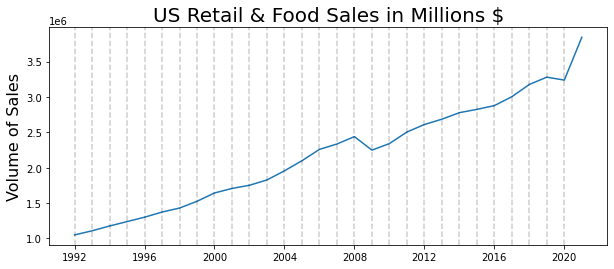

In [107]:
plt.figure(figsize=(10,4))
plt.plot(lim_retail_sales['ANNUAL_SUM'])
plt.title('US Retail & Food Sales in Millions $', fontsize=20)
plt.ylabel('Volume of Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [118]:
first_diff = lim_retail_sales.diff()['ANNUAL_SUM'][1:]

No handles with labels found to put in legend.


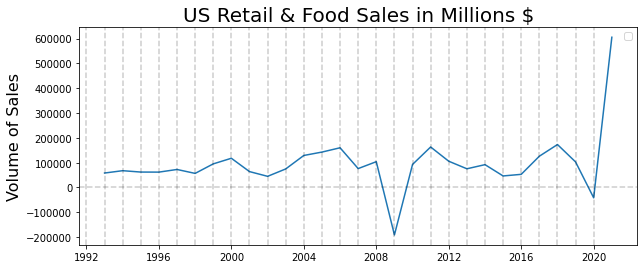

In [119]:
# Remove Growth trend
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('US Retail & Food Sales in Millions $', fontsize=20)
plt.ylabel('Volume of Sales', fontsize=16)
plt.legend()
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


<BarContainer object of 20 artists>

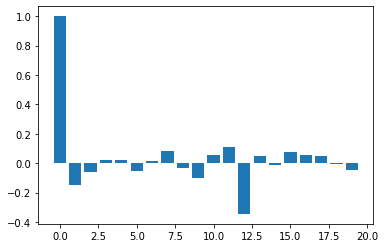

In [120]:
# ACF
acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

In [ ]:
#PACF
acf_vals = pacf(first_diff[-1:])
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])


In [187]:
train_end = datetime(2015,11,1)
test_end = datetime(2021,11,1)

train_data = lim_retail_sales['ANNUAL_SUM'][:train_end]
test_data = lim_retail_sales['ANNUAL_SUM'][train_end :test_end] #+ timedelta(days=1)

In [188]:
my_order = (0,1,0)
my_seasonal_order = (0, 1, 0, 6)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [189]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.016361713409423828


In [190]:
#summary of the model
print(model_fit.summary())

                                 Statespace Model Results                                
Dep. Variable:                        ANNUAL_SUM   No. Observations:                   24
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 6)   Log Likelihood                -219.289
Date:                           Tue, 23 Nov 2021   AIC                            440.578
Time:                                   21:33:23   BIC                            441.412
Sample:                               01-01-1992   HQIC                           440.661
                                    - 01-01-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.208e+09   9.18e+08      6.764      0.000    4.41e+09    8.01e+09
Ljung-Box (Q):                         nan 

In [191]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

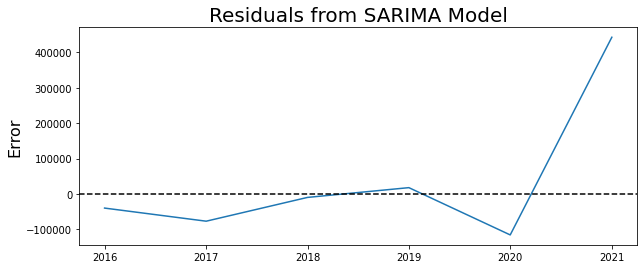

In [192]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

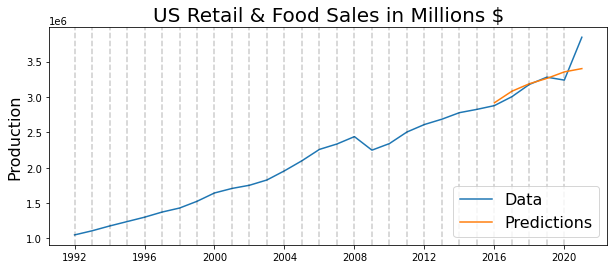

In [193]:
plt.figure(figsize=(10,4))

plt.plot(lim_retail_sales['ANNUAL_SUM'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('US Retail & Food Sales in Millions $', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [186]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.053
